# BA(hit)
HH 2,0,2<br>
HT 1,0,2<br>
KT 2,1,0<br>
LG 2,0,0<br>
LT 2,0,4<br>
NC 1,0,0<br>
OB 1,0,4<br>
SK 2,1,0<br>
SS 0,2,1<br>
WO 0,1,0<br>


In [4]:
import pandas as pd 
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import os
from datetime import datetime
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

In [52]:
# PIT
os.chdir("C:/Users/kw102/Desktop/project/NOVUS_Futures/Preprocessing/data/pit")
pit_HT = pd.read_csv('pit_HT.csv')
pit_HH = pd.read_csv('pit_HH.csv')
pit_KT = pd.read_csv('pit_KT.csv')
pit_LG = pd.read_csv('pit_LG.csv')
pit_LT = pd.read_csv('pit_LT.csv')
pit_NC = pd.read_csv('pit_NC.csv')
pit_OB = pd.read_csv('pit_OB.csv')
pit_SK = pd.read_csv('pit_SK.csv')
pit_SS = pd.read_csv('pit_SS.csv')
pit_WO = pd.read_csv('pit_WO.csv')

In [53]:
er_HT = pit_HT.iloc[:,[1,2]]
er_HH = pit_HH.iloc[:,[1,2]]
er_KT = pit_KT.iloc[:,[1,2]]
er_LG = pit_LG.iloc[:,[1,2]]
er_LT = pit_LT.iloc[:,[1,2]]
er_NC = pit_NC.iloc[:,[1,2]]
er_OB = pit_OB.iloc[:,[1,2]]
er_SK = pit_SK.iloc[:,[1,2]]
er_SS = pit_SS.iloc[:,[1,2]]
er_WO = pit_WO.iloc[:,[1,2]]

In [7]:
os.chdir("C:/Users/kw102/Desktop/project/NOVUS_Futures/Preprocessing/data/hit")
hit_HT = pd.read_csv('hit_HT.csv')
hit_HH = pd.read_csv('hit_HH.csv')
hit_KT = pd.read_csv('hit_KT.csv')
hit_LG = pd.read_csv('hit_LG.csv')
hit_LT = pd.read_csv('hit_LT.csv')
hit_NC = pd.read_csv('hit_NC.csv')
hit_OB = pd.read_csv('hit_OB.csv')
hit_SK = pd.read_csv('hit_SK.csv')
hit_SS = pd.read_csv('hit_SS.csv')
hit_WO = pd.read_csv('hit_WO.csv')

In [8]:
ba_HT = hit_HT.iloc[:,[1,2]]
ba_HH = hit_HH.iloc[:,[1,2]]
ba_KT = hit_KT.iloc[:,[1,2]]
ba_LG = hit_LG.iloc[:,[1,2]]
ba_LT = hit_LT.iloc[:,[1,2]]
ba_NC = hit_NC.iloc[:,[1,2]]
ba_OB = hit_OB.iloc[:,[1,2]]
ba_SK = hit_SK.iloc[:,[1,2]]
ba_SS = hit_SS.iloc[:,[1,2]]
ba_WO = hit_WO.iloc[:,[1,2]]

                              ARMA Model Results                              
Dep. Variable:                     BA   No. Observations:                   65
Model:                     ARMA(2, 2)   Log Likelihood                 218.718
Method:                       css-mle   S.D. of innovations              0.008
Date:                Thu, 24 Sep 2020   AIC                           -425.437
Time:                        01:43:25   BIC                           -412.391
Sample:                             0   HQIC                          -420.289
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2382      0.010     24.669      0.000       0.219       0.257
ar.L1.BA       0.2343      0.238      0.983      0.326      -0.233       0.701
ar.L2.BA       0.6310      0.231      2.732      0.0

<IPython.core.display.Javascript object>


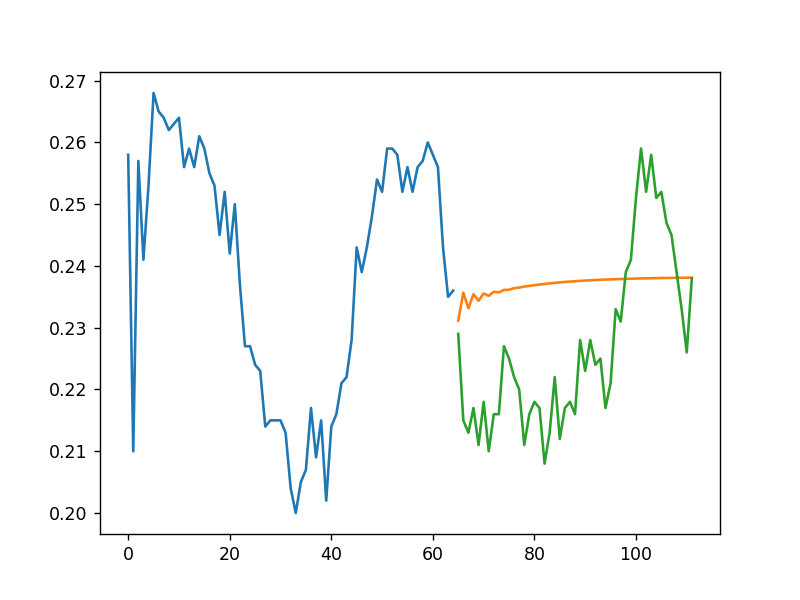

In [11]:
baHH_model = ARIMA(ba_HH.loc[:64, ['BA']], order=(2, 0, 2))
baHH_model_fit = baHH_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(baHH_model_fit.summary()))

test = ba_HH.loc[65:,['BA']]
fore = baHH_model_fit.forecast(steps=len(ba_HH.loc[65:,['BA']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(ba_HH.loc[:64,'BA'])
plt.plot(forecast)
plt.plot(test)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                   D.BA   No. Observations:                   64
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 192.570
Method:                       css-mle   S.D. of innovations              0.012
Date:                Thu, 24 Sep 2020   AIC                           -377.139
Time:                        01:44:38   BIC                           -368.504
Sample:                             1   HQIC                          -373.737
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.BA     0.2662      0.178      1.498      0.134      -0.082       0.615
ma.L1.D.BA    -0.2836      0.113     -2.501      0.012      -0.506      -0.061
ma.L2.D.BA    -0.7164      0.115     -6.204      0.0

<IPython.core.display.Javascript object>


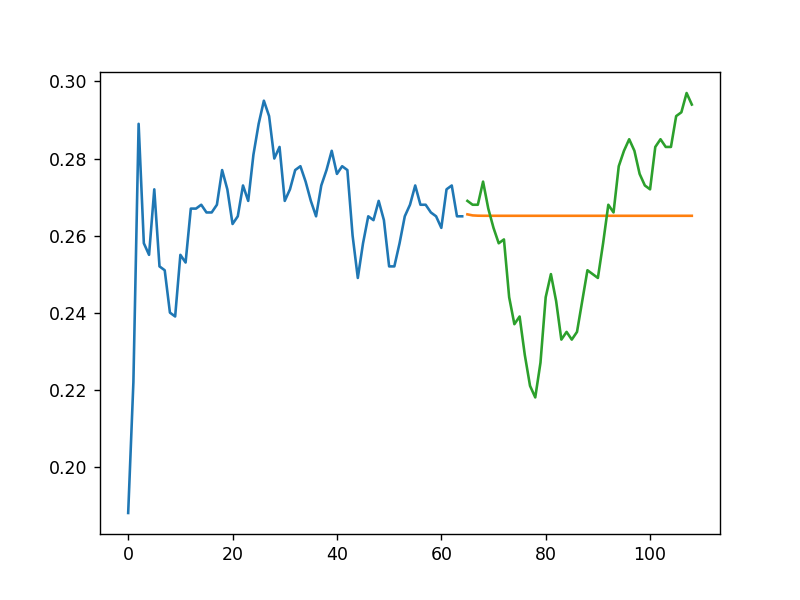

In [15]:
baHT_model = ARIMA(ba_HT.loc[:64, ['BA']], order=(1, 1, 2)) # 정상성 떄문에 1,0,2 -> 1,1,2 변경
baHT_model_fit = baHT_model.fit(trend='nc', full_output=True, disp=True)
print("{}\n".format(baHT_model_fit.summary()))

test = ba_HT.loc[65:,['BA']]
fore = baHT_model_fit.forecast(steps=len(ba_HT.loc[65:,['BA']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(ba_HT.loc[:64,'BA'])
plt.plot(forecast)
plt.plot(test)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                   D.BA   No. Observations:                   64
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 194.293
Method:                           css   S.D. of innovations              0.012
Date:                Thu, 24 Sep 2020   AIC                           -384.587
Time:                        01:47:11   BIC                           -380.269
Sample:                             1   HQIC                          -382.886
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.001      1.355      0.175      -0.001       0.005



<IPython.core.display.Javascript object>


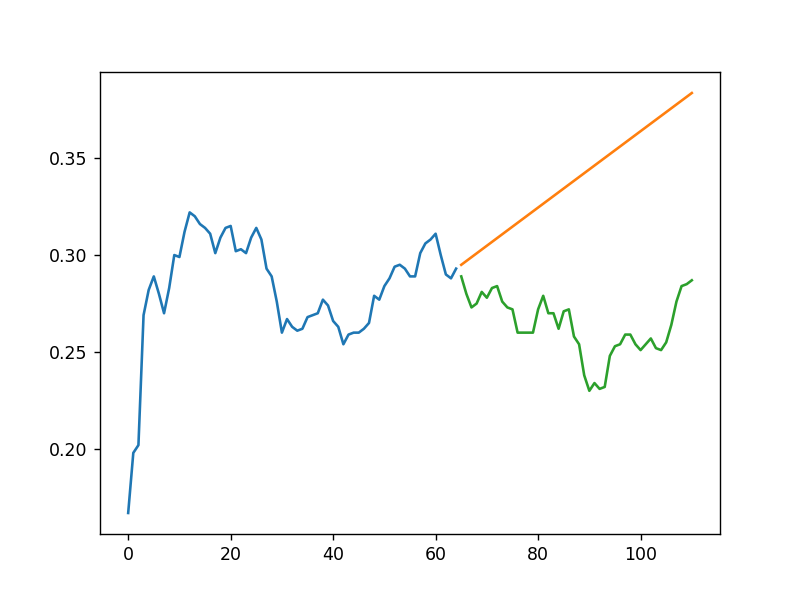

In [20]:
baKT_model = ARIMA(ba_KT.loc[:64, ['BA']], order=(0, 1, 0))
baKT_model_fit = baKT_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(baKT_model_fit.summary()))

test = ba_KT.loc[65:,['BA']]
fore = baKT_model_fit.forecast(steps=len(ba_KT.loc[65:,['BA']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(ba_KT.loc[:64,'BA'])
plt.plot(forecast)
plt.plot(test)
plt.show()

                              ARMA Model Results                              
Dep. Variable:                     BA   No. Observations:                   65
Model:                     ARMA(2, 2)   Log Likelihood                 218.718
Method:                       css-mle   S.D. of innovations              0.008
Date:                Thu, 24 Sep 2020   AIC                           -425.437
Time:                        01:47:49   BIC                           -412.391
Sample:                             0   HQIC                          -420.289
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2382      0.010     24.669      0.000       0.219       0.257
ar.L1.BA       0.2343      0.238      0.983      0.326      -0.233       0.701
ar.L2.BA       0.6310      0.231      2.732      0.0

<IPython.core.display.Javascript object>


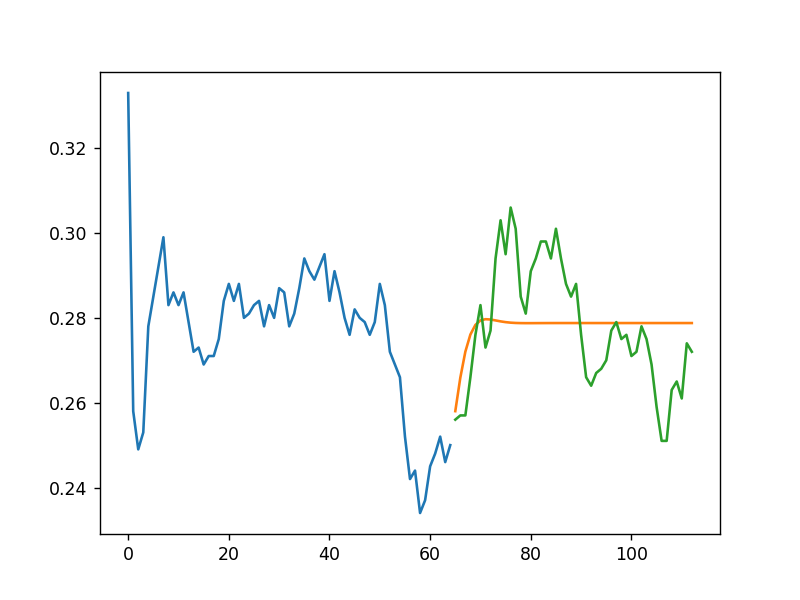

In [22]:
baLG_model = ARIMA(ba_LG.loc[:64, ['BA']], order=(2, 0, 0))
baLG_model_fit = baLG_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(baHH_model_fit.summary()))

test = ba_LG.loc[65:,['BA']]
fore = baLG_model_fit.forecast(steps=len(ba_LG.loc[65:,['BA']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(ba_LG.loc[:64,'BA'])
plt.plot(forecast)
plt.plot(test)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                   D.BA   No. Observations:                   64
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 213.193
Method:                       css-mle   S.D. of innovations              0.009
Date:                Thu, 24 Sep 2020   AIC                           -416.386
Time:                        01:49:22   BIC                           -405.591
Sample:                             1   HQIC                          -412.133
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.BA    -0.8065      0.251     -3.211      0.001      -1.299      -0.314
ar.L2.D.BA     0.1242      0.226      0.550      0.582      -0.318       0.567
ma.L1.D.BA     1.4597      0.204      7.168      0.0

<IPython.core.display.Javascript object>


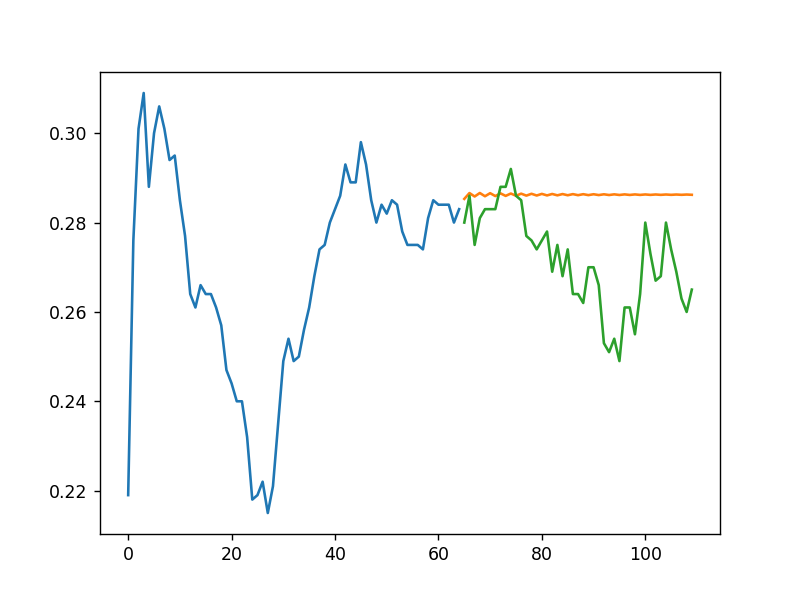

In [31]:
baLT_model = ARIMA(ba_LT.loc[:64, ['BA']], order=(2, 1, 2)) #정상성 떄문에 2,0,4 -> 2,1,2 변경
baLT_model_fit = baLT_model.fit(trend='nc', full_output=True, disp=True)
print("{}\n".format(baLT_model_fit.summary()))

test = ba_LT.loc[65:,['BA']]
fore = baLT_model_fit.forecast(steps=len(ba_LT.loc[65:,['BA']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(ba_LT.loc[:64,'BA'])
plt.plot(forecast)
plt.plot(test)
plt.show()

                              ARMA Model Results                              
Dep. Variable:                     BA   No. Observations:                   65
Model:                     ARMA(1, 0)   Log Likelihood                 223.495
Method:                       css-mle   S.D. of innovations              0.008
Date:                Thu, 24 Sep 2020   AIC                           -440.990
Time:                        01:50:26   BIC                           -434.467
Sample:                             0   HQIC                          -438.416
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2644      0.024     10.814      0.000       0.216       0.312
ar.L1.BA       0.9703      0.030     32.632      0.000       0.912       1.029
                                    Roots           

<IPython.core.display.Javascript object>


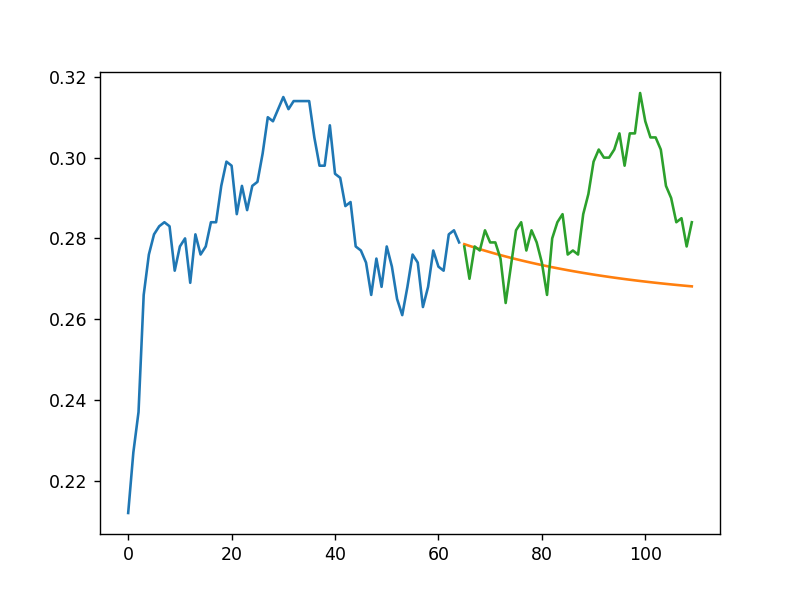

In [36]:
baNC_model = ARIMA(ba_NC.loc[:64, ['BA']], order=(1, 0, 0))
baNC_model_fit = baNC_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(baNC_model_fit.summary()))

test = ba_NC.loc[65:,['BA']]
fore = baNC_model_fit.forecast(steps=len(ba_NC.loc[65:,['BA']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(ba_NC.loc[:64,'BA'])
plt.plot(forecast)
plt.plot(test)
plt.show()

                              ARMA Model Results                              
Dep. Variable:                     BA   No. Observations:                   65
Model:                     ARMA(1, 4)   Log Likelihood                 201.560
Method:                       css-mle   S.D. of innovations              0.011
Date:                Thu, 24 Sep 2020   AIC                           -389.120
Time:                        01:51:09   BIC                           -373.899
Sample:                             0   HQIC                          -383.115
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2858      0.012     24.778      0.000       0.263       0.308
ar.L1.BA       0.6743      0.176      3.826      0.000       0.329       1.020
ma.L1.BA       0.6110      0.167      3.658      0.0

<IPython.core.display.Javascript object>


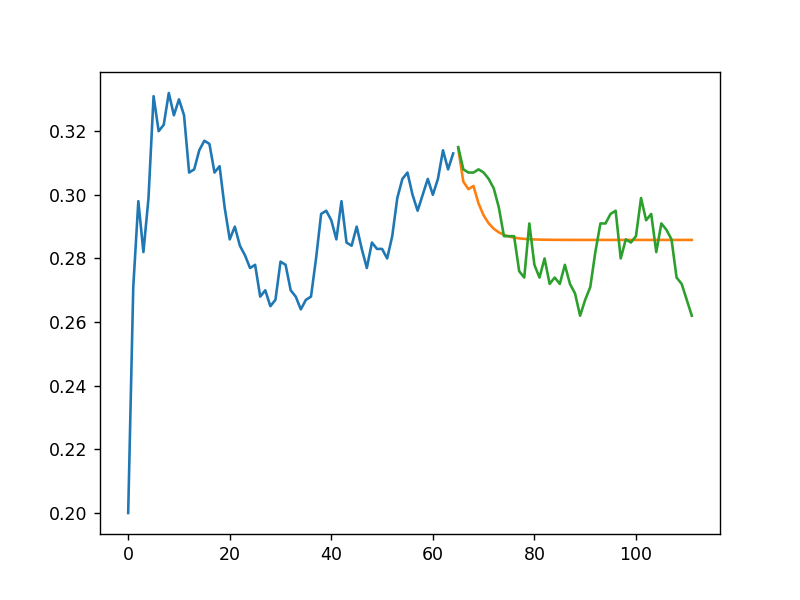

In [38]:
baOB_model = ARIMA(ba_OB.loc[:64, ['BA']], order=(1, 0, 4))
baOB_model_fit = baOB_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(baOB_model_fit.summary()))

test = ba_OB.loc[65:,['BA']]
fore = baOB_model_fit.forecast(steps=len(ba_OB.loc[65:,['BA']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(ba_OB.loc[:64,'BA'])
plt.plot(forecast)
plt.plot(test)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                   D.BA   No. Observations:                   64
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 187.846
Method:                       css-mle   S.D. of innovations              0.013
Date:                Thu, 24 Sep 2020   AIC                           -369.693
Time:                        01:51:56   BIC                           -363.216
Sample:                             1   HQIC                          -367.141
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.BA     0.9874      0.138      7.178      0.000       0.718       1.257
ar.L2.D.BA    -0.4454      0.195     -2.281      0.023      -0.828      -0.063
                                    Roots           

<IPython.core.display.Javascript object>


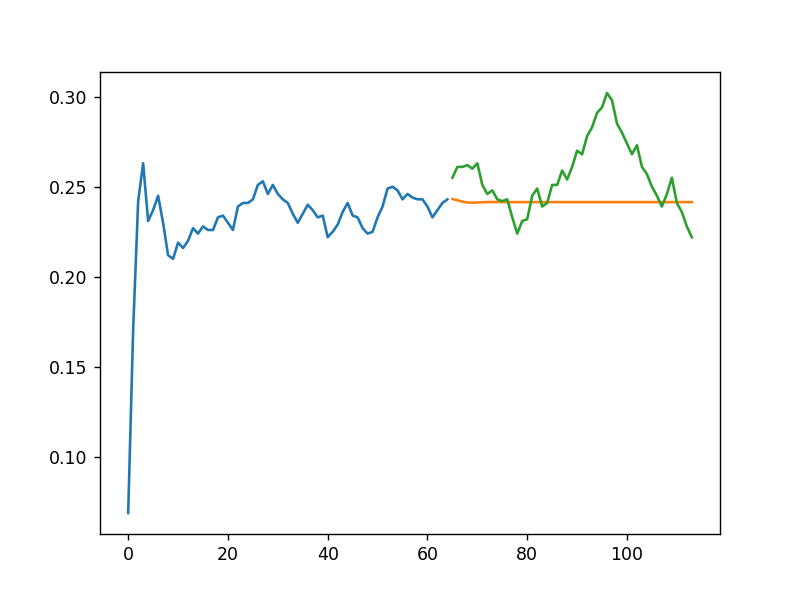

In [41]:
baSK_model = ARIMA(ba_SK.loc[:64, ['BA']], order=(2, 1, 0))
baSK_model_fit = baSK_model.fit(trend='nc', full_output=True, disp=True)
print("{}\n".format(baSK_model_fit.summary()))

test = ba_SK.loc[65:,['BA']]
fore = baSK_model_fit.forecast(steps=len(ba_SK.loc[65:,['BA']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(ba_SK.loc[:64,'BA'])
plt.plot(forecast)
plt.plot(test)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                  D2.BA   No. Observations:                   63
Model:                 ARIMA(0, 2, 1)   Log Likelihood                 210.485
Method:                       css-mle   S.D. of innovations              0.008
Date:                Thu, 24 Sep 2020   AIC                           -416.970
Time:                        01:53:13   BIC                           -412.684
Sample:                             2   HQIC                          -415.284
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ma.L1.D2.BA    -0.8378      0.076    -11.040      0.000      -0.987      -0.689
                                    Roots                                    
                  Real          Imaginary         

<IPython.core.display.Javascript object>


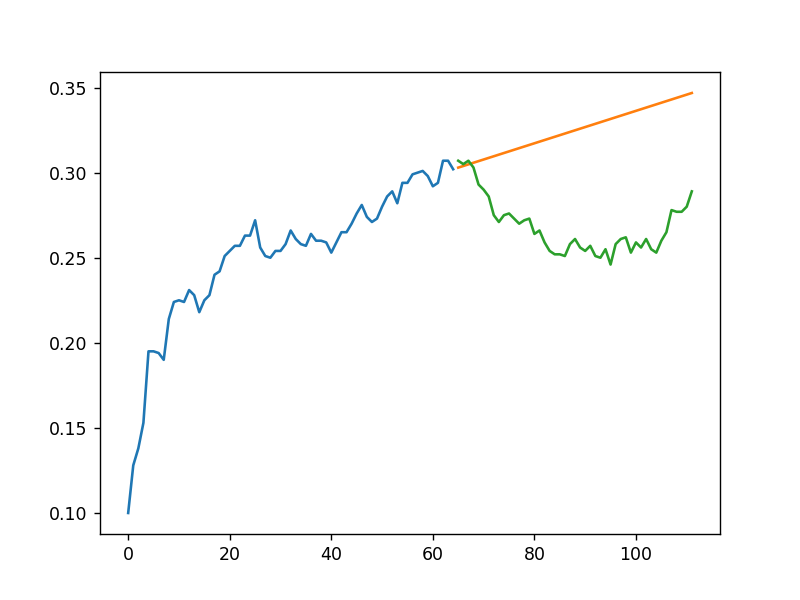

In [47]:
baSS_model = ARIMA(ba_SS.loc[:64, ['BA']], order=(0, 2, 1))
baSS_model_fit = baSS_model.fit(trend='nc', full_output=True, disp=True)
print("{}\n".format(baSS_model_fit.summary()))

test = ba_SS.loc[65:,['BA']]
fore = baSS_model_fit.forecast(steps=len(ba_SS.loc[65:,['BA']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(ba_SS.loc[:64,'BA'])
plt.plot(forecast)
plt.plot(test)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                   D.BA   No. Observations:                   64
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 209.084
Method:                           css   S.D. of innovations              0.009
Date:                Thu, 24 Sep 2020   AIC                           -414.168
Time:                        01:53:48   BIC                           -409.851
Sample:                             1   HQIC                          -412.467
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.001     -0.434      0.665      -0.003       0.002



<IPython.core.display.Javascript object>


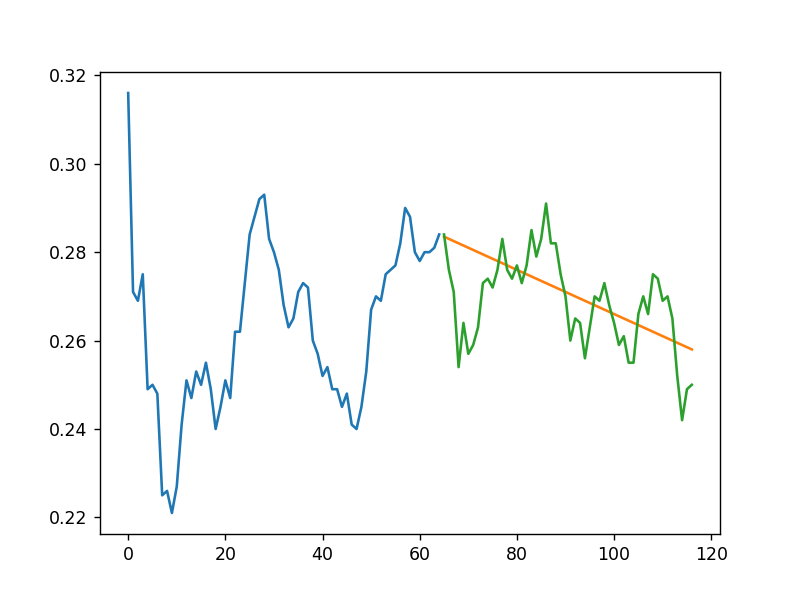

In [49]:
baWO_model = ARIMA(ba_WO.loc[:64, ['BA']], order=(0, 1, 0))
baWO_model_fit = baWO_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(baWO_model_fit.summary()))

test = ba_WO.loc[65:,['BA']]
fore = baWO_model_fit.forecast(steps=len(ba_WO.loc[65:,['BA']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(ba_WO.loc[:64,'BA'])
plt.plot(forecast)
plt.plot(test)
plt.show()


# ER(pit)
HH = 2,0,1 <br>
HT = 1,1,2 <br>
kT = 0,1,0 <br>
LG = 1,0,2 <br>
LT = 1,0,0 <br>
NC = 2,1,0 <br>
OB = 2,1,1 <br>
SK = 0,1,1<br>
SS = 0,1,0 <br>
WO = 1,0,1 <br>

                             ARIMA Model Results                              
Dep. Variable:                   D.ER   No. Observations:                   64
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 -29.110
Method:                       css-mle   S.D. of innovations              0.381
Date:                Thu, 24 Sep 2020   AIC                             64.220
Time:                        01:56:24   BIC                             70.697
Sample:                             1   HQIC                            66.771
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.ER     0.1876      0.138      1.361      0.173      -0.083       0.458
ar.L2.D.ER     0.2473      0.138      1.792      0.073      -0.023       0.518
                                    Roots           

<IPython.core.display.Javascript object>


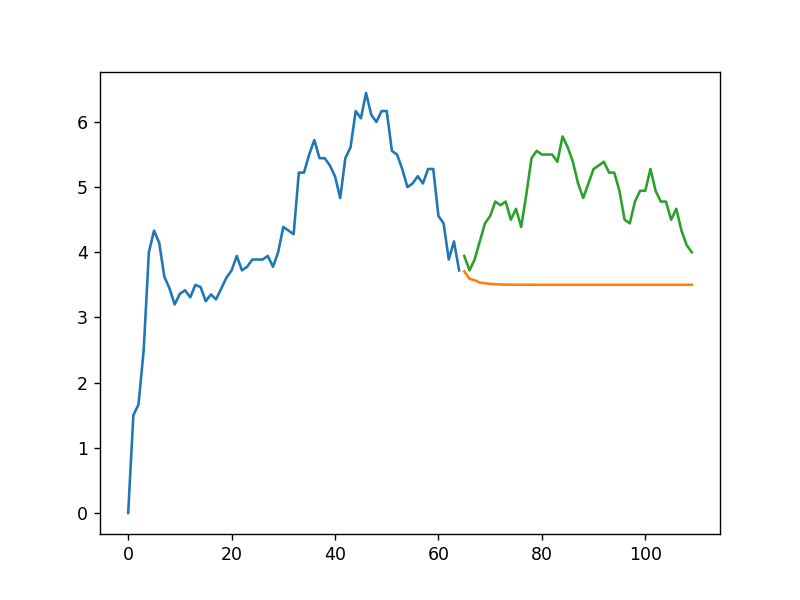

In [60]:
erNC_model = ARIMA(er_NC.loc[:64,['ER']], order=(2,1,0)) #정상성떄문에 2,0,1 -> 2,1,1 변경
erNC_model_fit = erNC_model.fit(trend='nc', full_output=True, disp=True)
print("{}\n".format(erNC_model_fit.summary()))

test = er_NC.loc[65:,['ER']]
fore = erNC_model_fit.forecast(steps=len(er_NC.loc[65:,['ER']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(er_NC.loc[:64,'ER'])
plt.plot(forecast)
plt.plot(test)

                             ARIMA Model Results                              
Dep. Variable:                   D.ER   No. Observations:                   64
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 -43.907
Method:                       css-mle   S.D. of innovations              0.472
Date:                Thu, 24 Sep 2020   AIC                             95.814
Time:                        01:56:58   BIC                            104.449
Sample:                             1   HQIC                            99.216
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.ER     0.6835      0.174      3.935      0.000       0.343       1.024
ar.L2.D.ER    -0.7896      0.123     -6.397      0.000      -1.031      -0.548
ma.L1.D.ER    -0.5664      0.139     -4.068      0.0

<IPython.core.display.Javascript object>


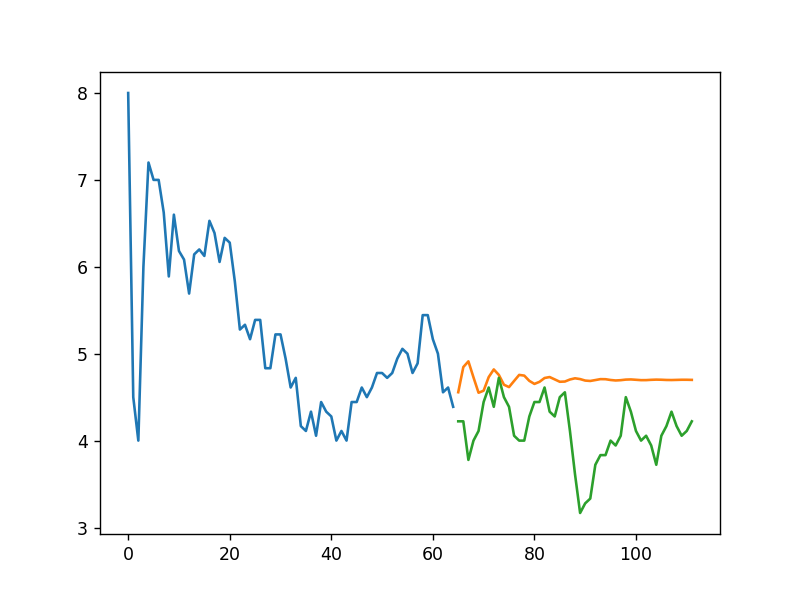

In [62]:
erOB_model = ARIMA(er_OB.loc[:64,['ER']], order=(2,1,1))
erOB_model_fit = erOB_model.fit(trend='nc', full_output=True, disp=True)
print("{}\n".format(erOB_model_fit.summary()))

test = er_OB.loc[65:,['ER']]
fore = erOB_model_fit.forecast(steps=len(er_OB.loc[65:,['ER']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(er_OB.loc[:64,'ER'])
plt.plot(forecast)
plt.plot(test)

                             ARIMA Model Results                              
Dep. Variable:                   D.ER   No. Observations:                   64
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -27.365
Method:                       css-mle   S.D. of innovations              0.371
Date:                Thu, 24 Sep 2020   AIC                             58.730
Time:                        01:57:57   BIC                             63.047
Sample:                             1   HQIC                            60.431
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.D.ER     0.1110      0.154      0.721      0.471      -0.191       0.413
                                    Roots                                    
                  Real          Imaginary           M

<IPython.core.display.Javascript object>


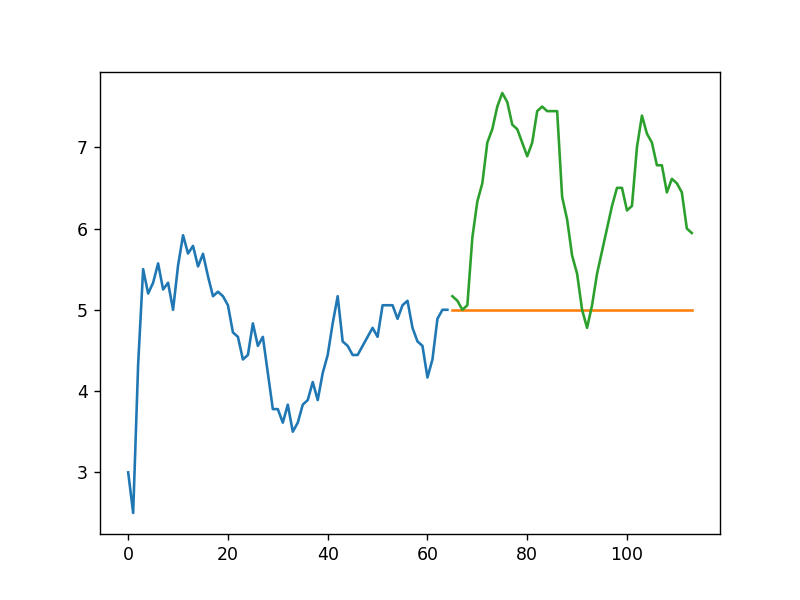

In [66]:
erSK_model = ARIMA(er_SK.loc[:64,['ER']], order=(0,1,1))
erSK_model_fit = erSK_model.fit(trend='nc', full_output=True, disp=True)
print("{}\n".format(erSK_model_fit.summary()))

test = er_SK.loc[65:,['ER']]
fore = erSK_model_fit.forecast(steps=len(er_SK.loc[65:,['ER']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(er_SK.loc[:64,'ER'])
plt.plot(forecast)
plt.plot(test)

                             ARIMA Model Results                              
Dep. Variable:                   D.ER   No. Observations:                   64
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -20.852
Method:                           css   S.D. of innovations              0.335
Date:                Thu, 24 Sep 2020   AIC                             45.703
Time:                        01:58:31   BIC                             50.021
Sample:                             1   HQIC                            47.404
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0095      0.042      0.228      0.820      -0.073       0.092



<IPython.core.display.Javascript object>


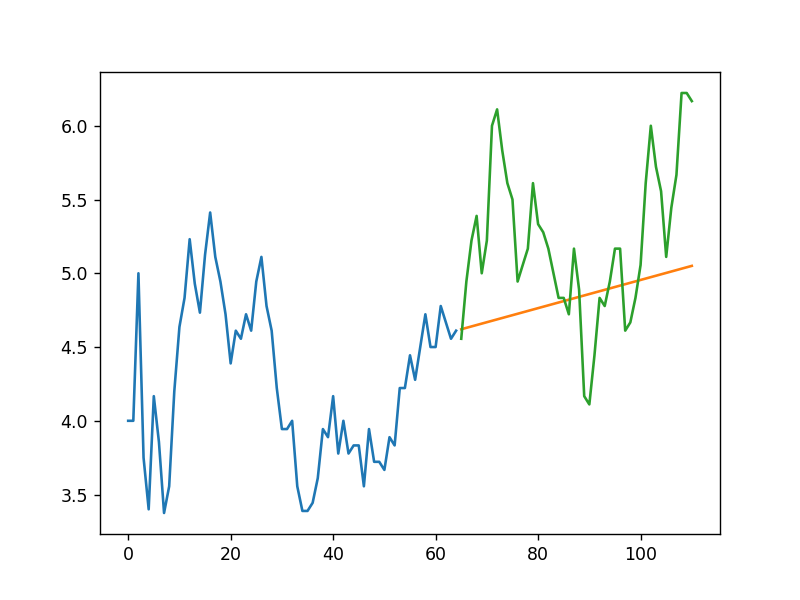

In [68]:
erSS_model = ARIMA(er_SS.loc[:64,['ER']], order=(0,1,0))
erSS_model_fit = erSS_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(erSS_model_fit.summary()))

test = er_SS.loc[65:,['ER']]
fore = erSS_model_fit.forecast(steps=len(er_SS.loc[65:,['ER']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(er_SS.loc[:64,'ER'])
plt.plot(forecast)
plt.plot(test)

                             ARIMA Model Results                              
Dep. Variable:                   D.ER   No. Observations:                   64
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 -29.165
Method:                       css-mle   S.D. of innovations              0.379
Date:                Thu, 24 Sep 2020   AIC                             66.330
Time:                        01:59:46   BIC                             74.965
Sample:                             1   HQIC                            69.732
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.ER     0.3219      0.319      1.008      0.313      -0.304       0.948
ar.L2.D.ER     0.4455      0.209      2.128      0.033       0.035       0.856
ma.L1.D.ER    -0.0130      0.332     -0.039      0.9

<IPython.core.display.Javascript object>


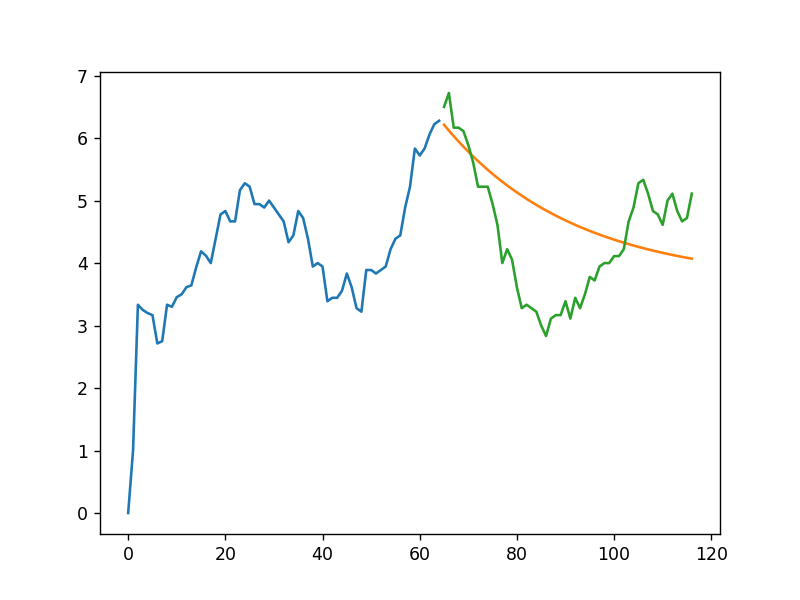

In [76]:
erWO_model = ARIMA(er_WO.loc[:64,['ER']], order=(1,0,1))
erWO_model_fit = erWO_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(erHH_model_fit.summary()))

test = er_WO.loc[65:,['ER']]
fore = erWO_model_fit.forecast(steps=len(er_WO.loc[65:,['ER']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(er_WO.loc[:64,'ER'])
plt.plot(forecast)
plt.plot(test)